In [1]:
# let's import important libraries
import numpy as np
from numpy import hstack
from matplotlib import pyplot as plt
import math

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout, Flatten
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model
from keras.layers import ConvLSTM2D

import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error


In [2]:
# truncate the full data to check only orientation x

dataframe = pd.read_csv('../extract-data/normal following/ICAB1/01_icab1_reverse_straight0_2021-03-26-13-25-50_0/icab1-mavros-imu-data.csv', usecols=[18,19,20,30,31,32])
#dataframe = pd.read_csv('../extract-data/ICAB1/02_icab1_reverse_fail_overtaking0_2021-03-26-14-40-28_0/icab1-mavros-imu-data.csv')
#df = dataframe[['Time', 'orientation.x']]

#convert time step to the date and time format
#df['Time'] = pd.to_datetime(df['Time'], unit='s')
#df
dataframe

,angular_velocity.x,angular_velocity.y,angular_velocity.z,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z
0,0.001369,0.003281,-0.003239,0.421686,-0.215746,9.885103
1,-0.000466,0.002388,-0.003293,0.411879,-0.294199,9.875297
2,-0.001836,0.002453,-0.002719,0.411879,-0.304006,9.894910
3,-0.001633,0.004359,-0.001778,0.411879,-0.294199,9.875297
4,0.000206,0.005041,-0.002078,0.402073,-0.264780,9.885103
...,...,...,...,...,...,...
1442,-0.001596,0.002113,-0.002849,0.362846,-0.392266,9.826263
1443,-0.001849,0.004086,-0.001547,0.284393,-0.451106,9.855683
1444,-0.001895,0.003308,-0.000129,0.284393,-0.382459,9.865490
1445,-0.001457,0.003179,0.001361,0.382459,-0.411879,9.894910


In [6]:
# print the start and ending dates for collecting datas
#print("Start date is: ", df['Time'].min())
#print("End date is: ", df['Time'].max())
dataset_array = dataframe.values
df_for_training = dataset_array.astype(float)
print(df_for_training.shape)

(1447, 6)


In [4]:
angular_velocity_x = dataframe["angular_velocity.x"]
angular_velocity_y = dataframe["angular_velocity.y"]
angular_velocity_z = dataframe["angular_velocity.z"]

linear_acceleration_x = dataframe["linear_acceleration.x"]
linear_acceleration_y = dataframe["linear_acceleration.y"]
linear_acceleration_z = dataframe["linear_acceleration.z"]

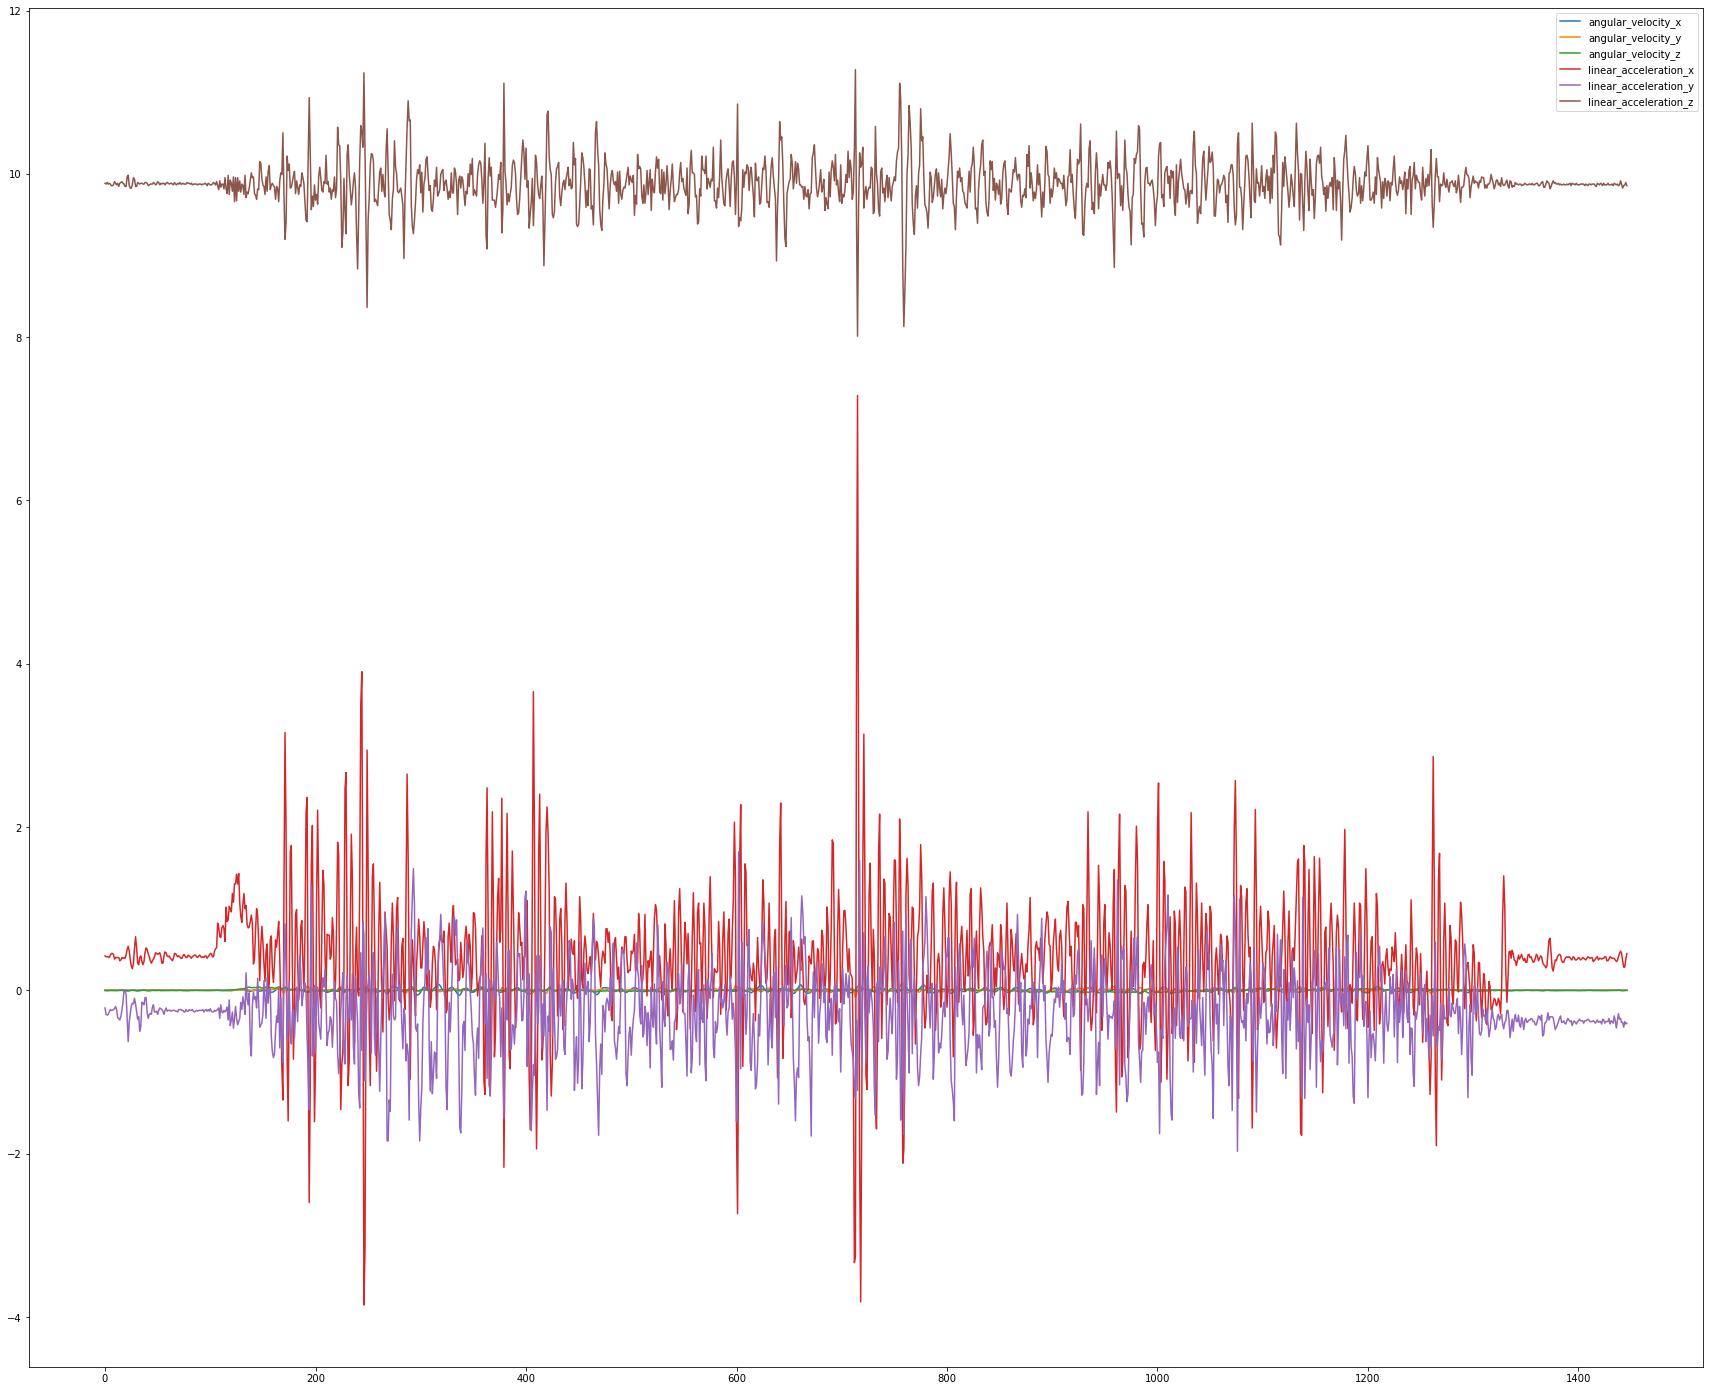

In [5]:
# plot the variation vs time i
fig, axes = plt.subplots(1,1, figsize = (30,25))
plt.plot(angular_velocity_x)
plt.plot(angular_velocity_y)
plt.plot(angular_velocity_z)

plt.plot(linear_acceleration_x)
plt.plot(linear_acceleration_y)
plt.plot(linear_acceleration_z)

plt.legend(["angular_velocity_x", "angular_velocity_y", "angular_velocity_z", "linear_acceleration_x", "linear_acceleration_y", "linear_acceleration_z"])


#sns.lineplot(x=dataframe['Time'], y=dataframe['orientation.x'])

In [8]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, Y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)